## Motivation

One major component of the industrial economy here in the United States and around the world is the automotive industry. An exciting development in that industry, one with potential to have a salutary impact on the environment, is the shift toward electric vehicles. Prior to 2012, electric vehicle sales were almost negligible. In the year 2011, a total of 17,763 "plug-in" vehicles - either fully battery powered or plug-in hybrid - were sold in the United States. In 2023, there were 1.5 million such vehicles sold. Such a shift in the fueling of transportation has significant ramifications for our collective energy needs for future decades. Most immediately, it likely augurs a decline in demand for petroleum and an increase in demand for electricity. It's easy to see that there are many entities and industries that would have a significant interest in the trend of electric vehicle sales. The purpose of this project is to analyze the trend in the sales of battery powered vehicles in the United States. 

## The Data

The data comes from *Argonne National Laboratory * ^[https://www.anl.gov/esia/light-duty-electric-drive-vehicles-monthly-sales-updates] which they compiled from a number of different sources. The dataset contains, for each month and year, the total number of battery-powered vehicles (*BEV*), plug-in hybrid (*PHEV*), hybrid-electric vehicles (*HEV*), and the total number of light-duty vehicles sold (*LDV*). The dataset appears to be complete and without any apparent missing value or wrong entries. The sales figures are recorded from December of 2010 through January of 2024. 

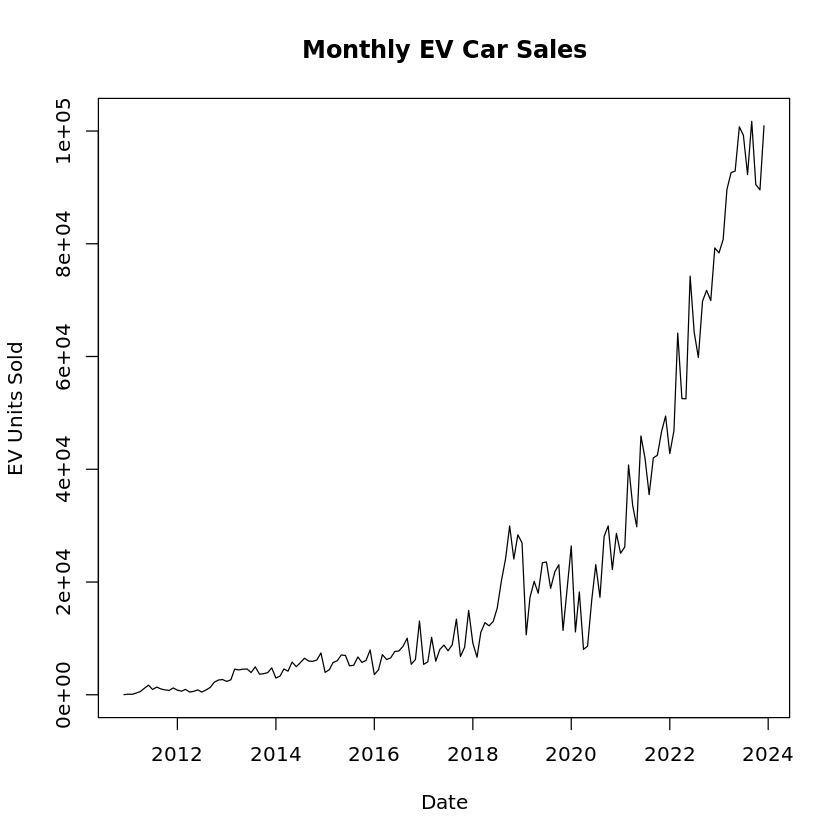

In [5]:
#install.packages(c('zoo', 'knitr'))
#library(zoo)

ev_sales <- read.csv('Electric_Vehicle_Sales_Data.csv')
#print(c(length(as.Date(as.yearmon(ev_sales$Month, format='%y-%b'))), length(ev_sales$BEV)))
ev_sales$Date <- as.Date(as.yearmon(ev_sales$Month, format='%y-%b'))
#head(ev_sales)
bev <- ev_sales[,c(2, 6)]
plot(bev$Date,bev$BEV, type='l', main = 'Monthly EV Car Sales', xlab = 'Date', ylab = 'EV Units Sold')

# Exploratory Data Analysis

A graph of sales over time (Figure ), shows a strong and increasingly positive trend in the sales amounts. The increasingly positive slope becomes particularly apparent after 2016. Not unexpectedly, there is a noticeable dip in the early months of 2020, presumably the effects of COVID shutdows on many different parts of the automotive supply chain. There is no apparent heteroscedasticity that can be seen in the line plot. 

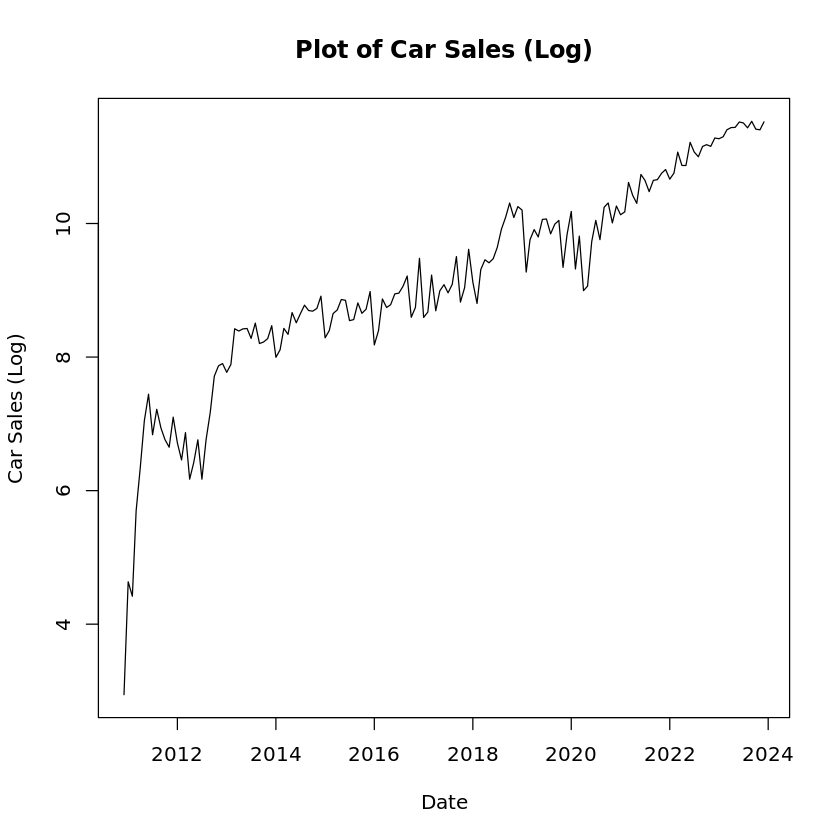

In [3]:
plot(bev$Date, log(bev$BEV), type = 'l', main = 'Plot of Car Sales (Log)', xlab='Date',  ylab='Car Sales (Log)')

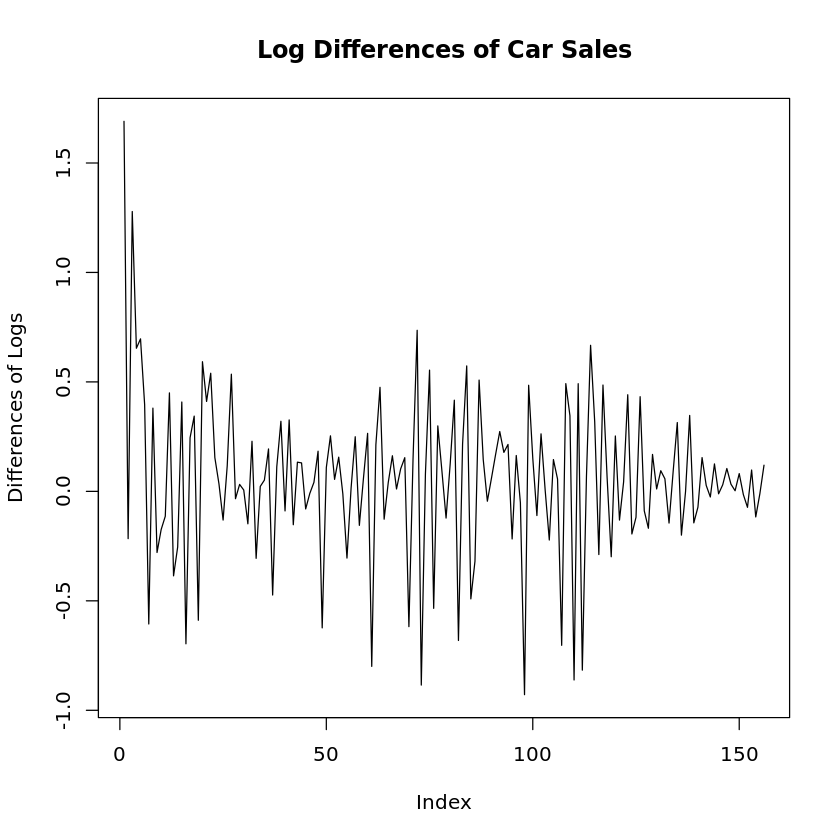

In [ ]:
plot(diff(log(bev$BEV)), type='l', main = 'Log Differences of Car Sales', ylab = 'Differences of Logs')

# Model Exploration

To explore a large amount of different ARMA models, we generated a table that would create ARMA models with varying values of p and q. We used AIC values first from the various models to help identify good candidates to further analyze. These ARMA(p,q) models will be fit according to equation [M9] on slide 13 in lecture 4:

$$Y_n = \mu + \phi_1Y_{n-1} + \phi_2Y_{n-2} + \cdot\cdot\cdot +\phi_pY_{n-p}+\epsilon_n +\psi_1\epsilon_{n-1} + \psi_2\epsilon_{n-2} + \cdot\cdot\cdot + \psi_q\epsilon_{n-q} $$

Where $\mu$ is the mean, ${\epsilon_n}$ is a white noise process, which we assume to follow a normal distribution with mean = 0, and variance = $\sigma^2$ slide 3 in source lecture 4. The vectors $(\phi_1,...,\phi_p)$ and $(\psi_1,...,\psi_q)$ correspond to the learned auto regressive and moving average coefficients respectively (slides 11-12 in lecture 4). After fitting models with p values up to 4, and q values up to 5, I created the table with Akaike's Information Criteria values according to the formula given on slide 21 in lecture 5. $$AIC = -2 \times \ell(\theta^*) + 2D $$ where $\ell$ is the log likelihood and D is the number of parameters in the model. Because of the exponential trend in our data, we tried both a raw fit as well as a fit on log transformed data.

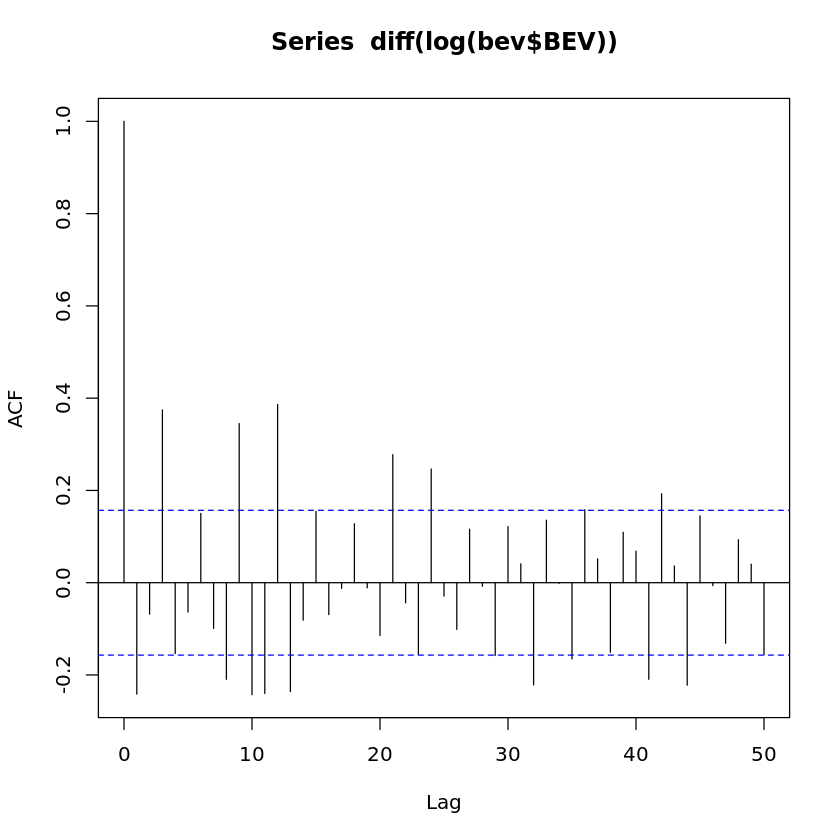

In [ ]:
acf(diff(log(bev$BEV))), lag.max=50)

In [13]:

library(knitr)
aic_table <- function(data,P,Q){ 
  table <- matrix(NA,(P+1),(Q+1)) 
  for(p in 0:P) {
    for(q in 0:Q) {
    try(table[p+1,q+1] <- arima(data,order=c(p,1,q), method='ML')$aic)
    } 
  }
  dimnames(table) <- list(paste("AR",0:P, sep=""),
    paste("MA",0:Q,sep=""))
  table
}
aic_table2 <- aic_table(log(bev$BEV),12,12)

kable(aic_table2,digits=2)

Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(data, order = c(p, 1, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(data, order = c(p, 1, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(data, order = c(p, 1, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 1, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 1, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 1, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 1, q), method = "ML"):



|     |    MA0|    MA1|    MA2|    MA3|    MA4|    MA5|    MA6|    MA7|    MA8|    MA9|  MA10|  MA11|  MA12|
|:----|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|-----:|-----:|-----:|
|AR0  | 136.21| 129.52| 126.20| 110.28| 108.46| 109.95| 111.11| 112.97| 106.00| 111.38| 91.52| 93.14| 87.74|
|AR1  | 129.41| 130.93| 122.43| 108.52| 110.24| 111.09| 112.64| 114.62| 107.81| 100.83| 93.34| 85.55| 87.24|
|AR2  | 129.44| 119.18| 120.48| 109.91| 109.44| 100.25| 112.71| 113.95|  97.29|  91.05| 91.88| 87.05| 88.89|
|AR3  | 106.06| 107.88| 109.88| 110.94| 112.73| 101.83| 103.56| 105.14|  97.23|  92.81| 93.71| 89.04| 86.35|
|AR4  | 107.89| 109.88| 111.88| 112.13| 106.93| 102.89| 104.37| 106.17| 102.18|  86.58| 88.50| 83.31| 87.42|
|AR5  | 109.88| 111.88| 113.88| 113.57| 114.66| 104.85| 103.11| 103.67| 104.89|  88.65| 89.73| 86.86| 85.17|
|AR6  | 111.85| 113.85|  95.69|  94.60| 114.33| 102.57| 104.97| 110.37| 112.21|  87.92| 91.58| 85.96| 84.81|
|AR7  | 113.78| 1

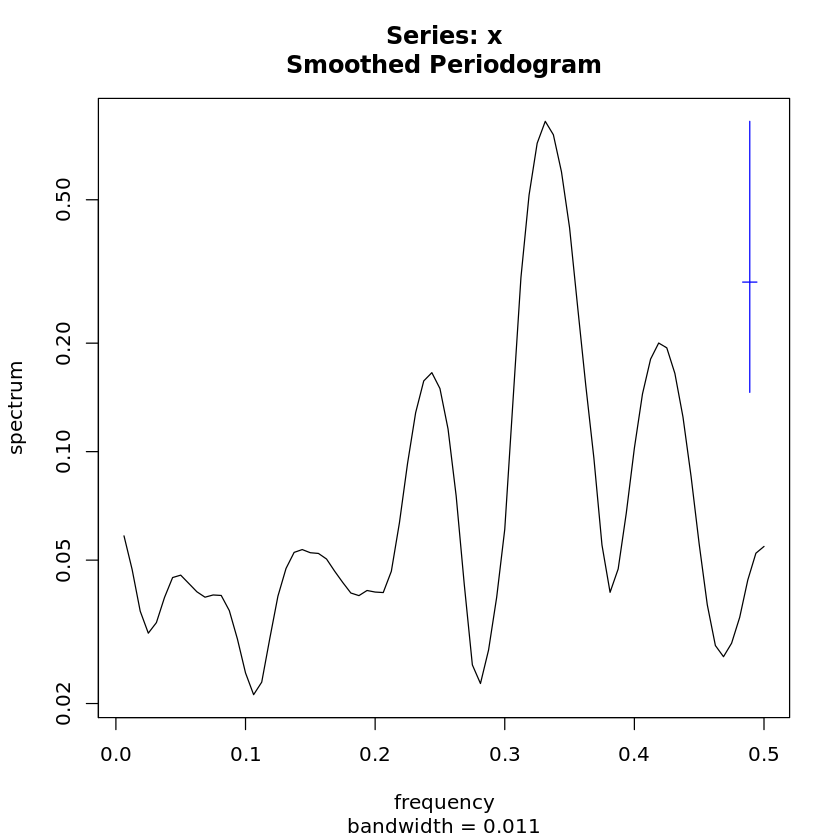

In [6]:
spectrum(diff(log(bev$BEV)), spans=c(4,4))

[1] 0.3336673


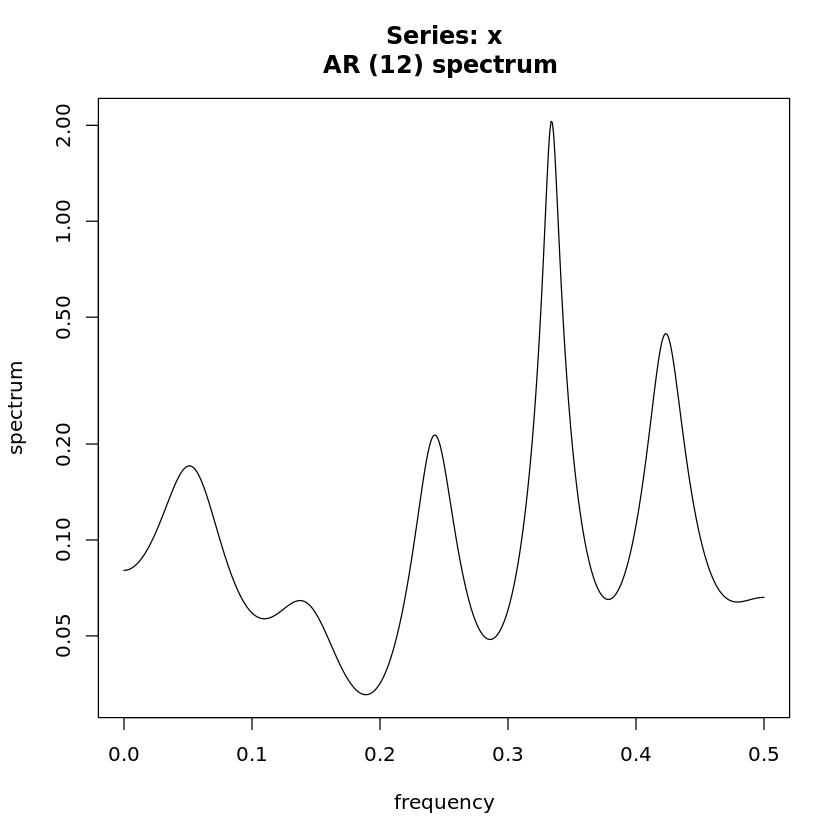

In [44]:
s = spectrum(diff(log(bev$BEV)), method = 'ar')
print(s$freq[which.max(s$spec)])

# Model Results and Analysis

In [19]:
model_1 <- arima(log(bev$BEV), order=c(10,1,6), method='ML')
model_1


Warning message in log(s2):
“NaNs produced”



Call:
arima(x = log(bev$BEV), order = c(10, 1, 6), method = "ML")

Coefficients:
         ar1     ar2     ar3     ar4     ar5      ar6      ar7      ar8     ar9
      0.0275  0.0657  0.9904  0.0361  0.0302  -0.9087  -0.0773  -0.1988  0.4918
s.e.  0.0962  0.0808  0.0821  0.1145  0.0902   0.0887   0.1178   0.0809  0.0843
         ar10      ma1     ma2      ma3     ma4     ma5     ma6
      -0.1617  -0.0739  0.0511  -0.7471  0.0150  0.0337  0.9324
s.e.   0.1001   0.0607  0.0566   0.0532  0.0575  0.0603  0.0683

sigma^2 estimated as 0.06881:  log likelihood = -20.44,  aic = 74.88

In [33]:
model_95 = arima(log(bev$BEV), order= c(9,1,5), method='ML')

In [35]:
test_stat <- model_1$loglik - model_95$loglik
print(1-pchisq(2*test_stat, 2))

[1] 0.08198257


In [37]:
AR_roots <- polyroot(c(1,-coef(model_95)[c("ar1", 'ar2', "ar3", 'ar4', "ar5", 'ar6' ,"ar7", 'ar8' ,"ar9")]))
MA_roots <- polyroot(c(1,coef(model_95)[c("ma1", 'ma2', 'ma3' ,'ma4', 'ma5')]))
print(Mod(AR_roots))
print(Mod(MA_roots))

[1] 1.050115 1.061363 1.003538 1.061363 1.029070 1.050115 1.443392 1.029070
[9] 4.728405
[1] 1.000000 1.032622 1.000000 1.013846 1.032622


In [22]:
aic_table2 <- function(data,P,Q){ 
  table <- matrix(NA,(P+1),(Q+1)) 
  for(p in 0:P) {
    for(q in 0:Q) {
    try(table[p+1,q+1] <- arima(data,order=c(p,2,q), method='ML')$aic)
    } 
  }
  dimnames(table) <- list(paste("AR",0:P, sep=""),
    paste("MA",0:Q,sep=""))
  table
}
aic_table22 <- aic_table2(log(bev$BEV),12,12)

kable(aic_table22,digits=2)

Warning message in arima(data, order = c(p, 2, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 2, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(data, order = c(p, 2, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 2, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 2, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 2, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 2, q), method = "ML"):
“possible convergence problem: optim gave code = 1”
Warning message in arima(data, order = c(p, 2, q), method = "ML"):
“possible co



|     |    MA0|    MA1|    MA2|    MA3|    MA4|    MA5|    MA6|    MA7|    MA8|    MA9|   MA10|   MA11|  MA12|
|:----|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|-----:|
|AR0  | 265.75| 139.78| 127.83| 127.71| 113.71| 110.88| 112.69| 114.79| 116.15| 113.11| 115.18|  89.97| 90.50|
|AR1  | 210.20| 130.42| 130.82| 125.15| 111.42| 112.79| 113.25| 114.34| 111.88| 113.81| 104.85|  91.06| 86.90|
|AR2  | 120.94| 113.51| 113.16| 115.07| 112.28| 114.13| 102.43| 107.98| 104.35|  98.25|  94.82|  91.50| 86.07|
|AR3  | 117.63| 109.10| 111.06| 113.05| 113.92| 115.84| 105.09| 113.33| 104.75| 105.38|  99.69|  95.32| 90.65|
|AR4  | 116.11| 111.05| 113.05| 113.60| 115.29| 109.90| 114.28| 117.52| 110.37| 107.42|  95.28| 100.80| 84.90|
|AR5  | 115.67| 113.05| 113.26|  94.83| 109.75| 111.44| 114.62|  93.59| 120.45| 110.09|  96.26|  92.41| 87.89|
|AR6  | 116.31| 115.05| 113.71| 113.63|  92.33|  95.23| 117.21| 108.31|  89.39|  94.27|  95.78|  93.69| 87.92|

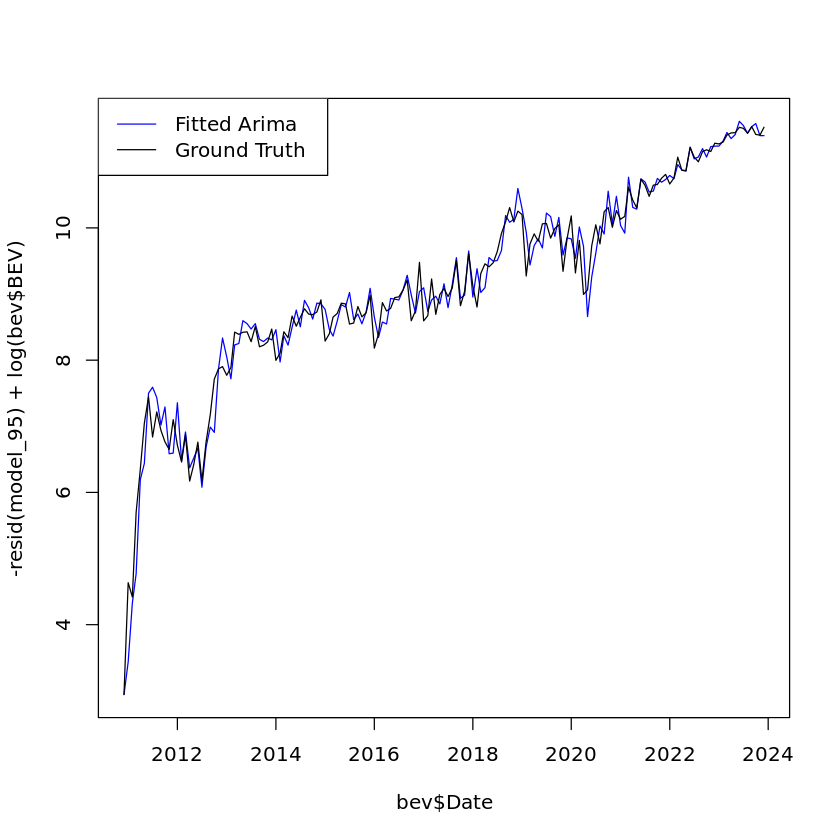

In [38]:
plot(bev$Date, -resid(model_95) + log(bev$BEV), type='l', col='blue')
lines(bev$Date, log(bev$BEV), col='black')
legend('topleft', legend=c('Fitted Arima', 'Ground Truth'), col=c('blue','black'),lty=1)

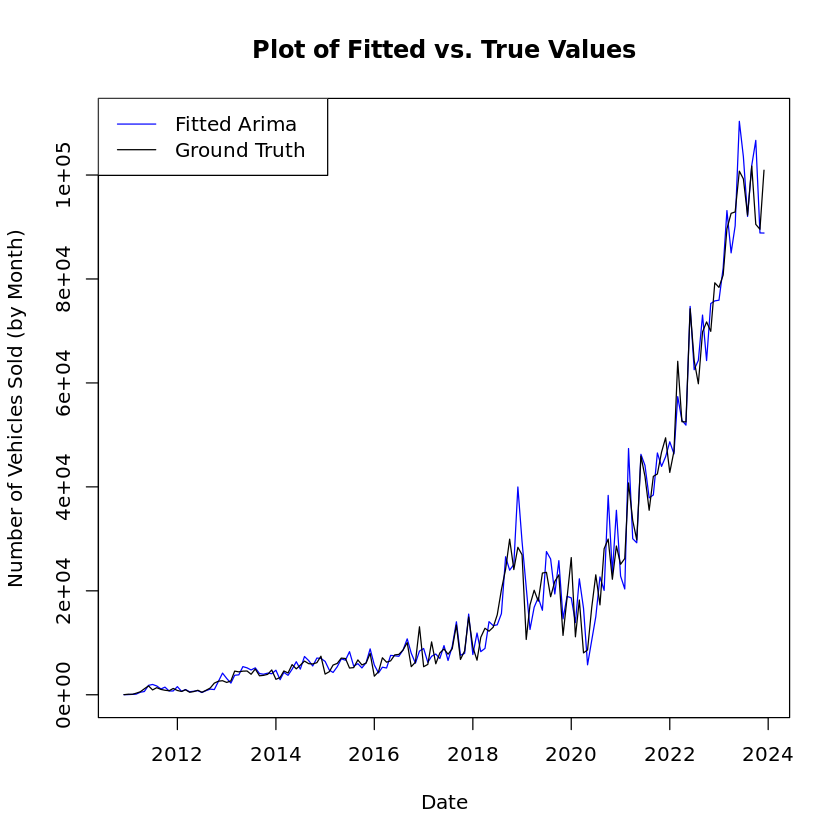

In [39]:
plot(bev$Date, exp(-resid(model_95) + log(bev$BEV)), type='l', col='blue', main='Plot of Fitted vs. True Values',
     xlab='Date', ylab='Number of Vehicles Sold (by Month)')
lines(bev$Date, exp(log(bev$BEV)), col='black')
legend('topleft', legend=c('Fitted Arima', 'Ground Truth'), col=c('blue','black'),lty=1)

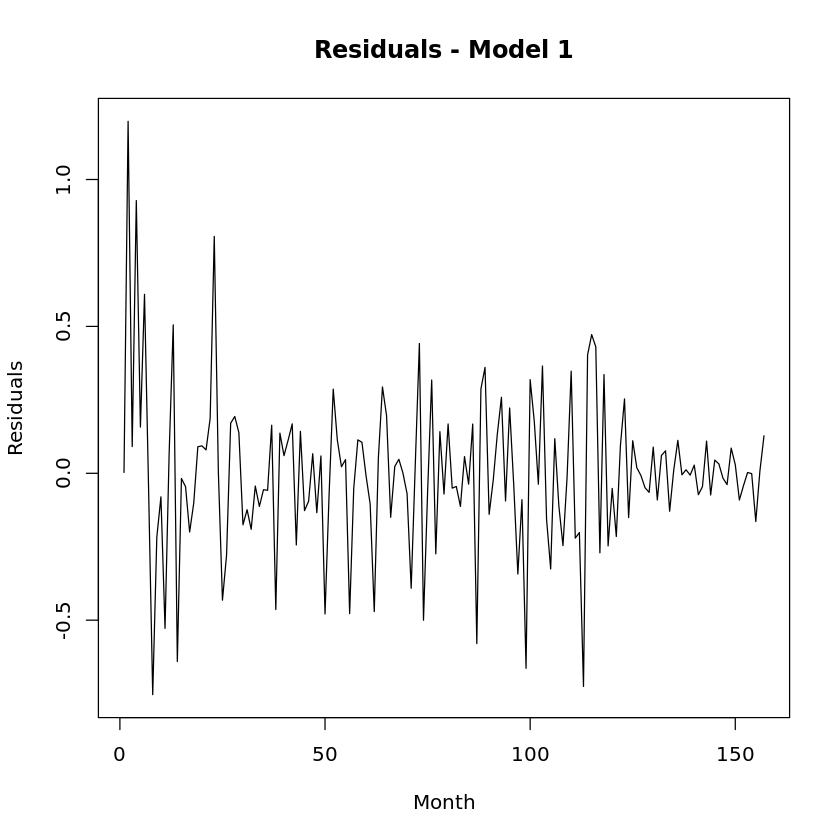

In [40]:
plot(model_95$residuals,main='Residuals - Model 1',ylab='Residuals',xlab='Month')

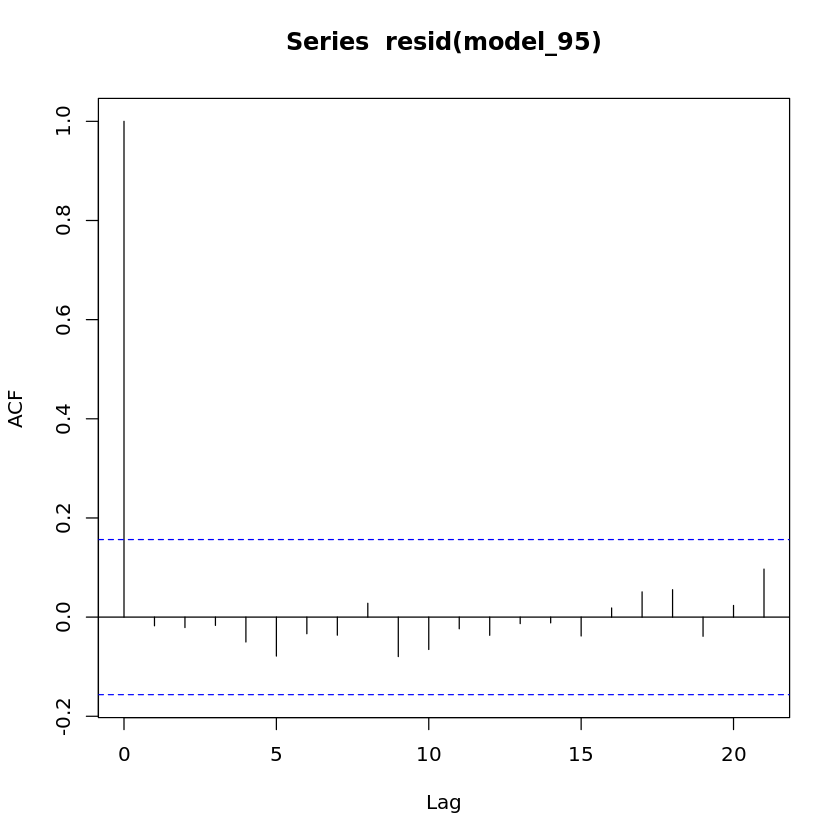

In [41]:
acf(resid(model_95))

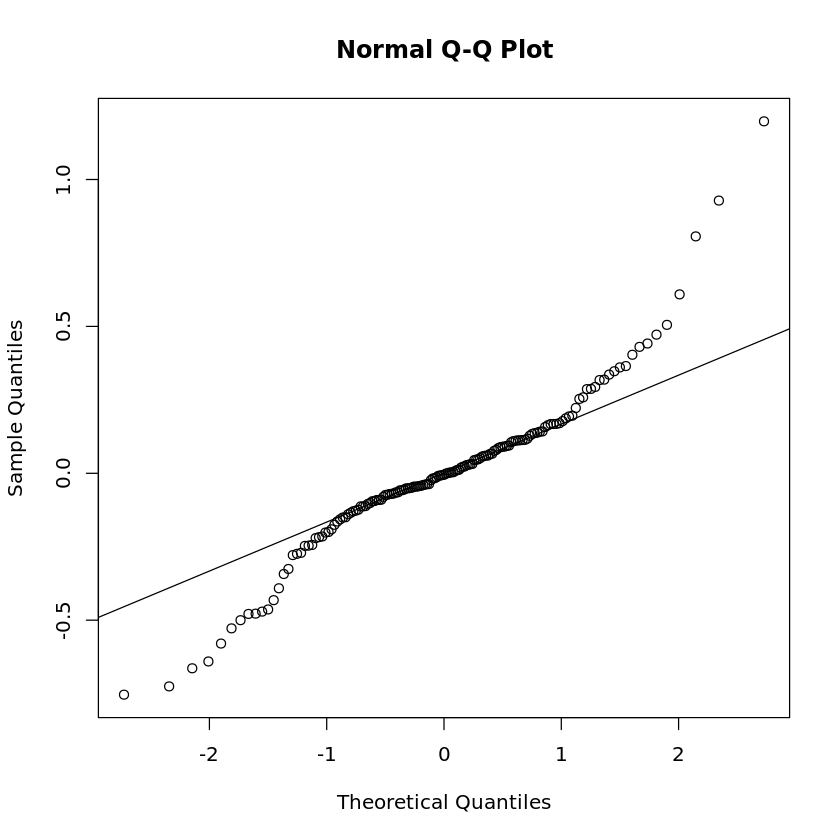

In [42]:
qqnorm(model_95$residuals)
qqline(model_95$residuals)

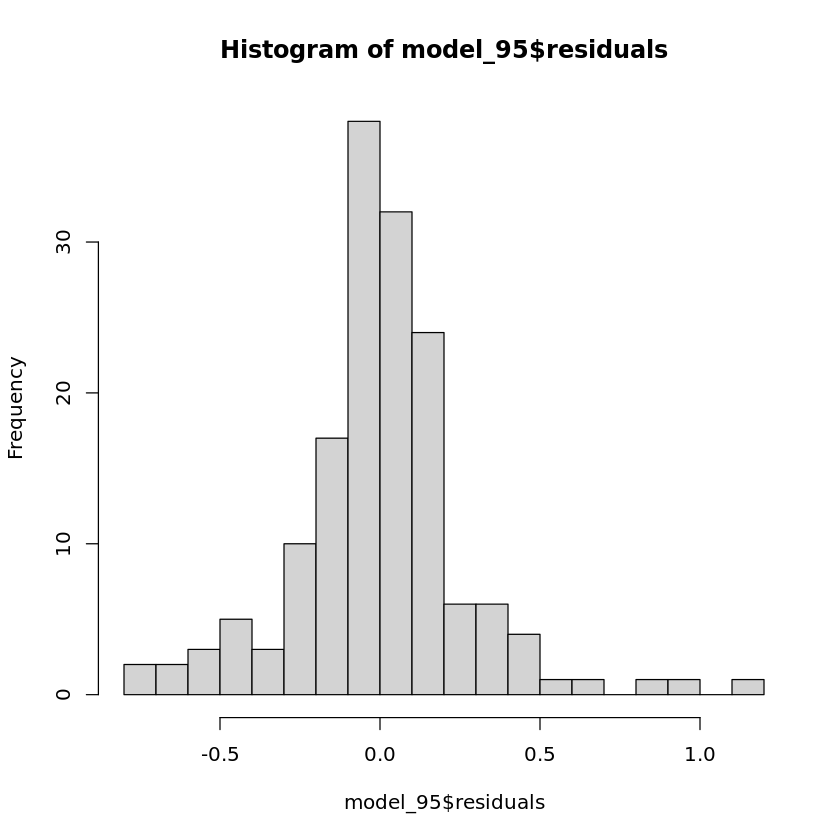

In [43]:
hist(model_95$residuals, breaks=20)

In [ ]:
model_2 <- arima(log(bev$BEV), order=c(9,1,5), seasonal=list(order=c(0,0,1), period=3), method='ML')
model_2

Warning message in arima(log(bev$BEV), order = c(9, 1, 6), seasonal = list(order = c(0, :
“possible convergence problem: optim gave code = 1”



Call:
arima(x = log(bev$BEV), order = c(9, 1, 6), seasonal = list(order = c(0, 0, 
    1), period = 3), method = "ML")

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6     ar7     ar8
      -1.0223  -1.4979  -0.9832  -0.9483  -0.2082  -0.2347  0.3255  0.1447
s.e.   0.3201   0.4545   0.6227   0.6171   0.4868   0.3135  0.3001  0.2208
         ar9     ma1     ma2     ma3     ma4    ma5     ma6    sma1
      0.3995  1.0179  1.6626  1.1939  1.2095  0.495  0.6620  0.2482
s.e.  0.1859  0.3305  0.4493  0.6081  0.6686  0.524  0.3692  0.1821

sigma^2 estimated as 0.07255:  log likelihood = -22.42,  aic = 78.84

In [50]:
# install.packages('forecast')
library(forecast)
model_best <- auto.arima(log(bev$BEV), d=1, D=3, seasonal=True)
summary(model_best)

ERROR: Error in library(forecast): there is no package called ‘forecast’


In [51]:
require("forecast")

Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”


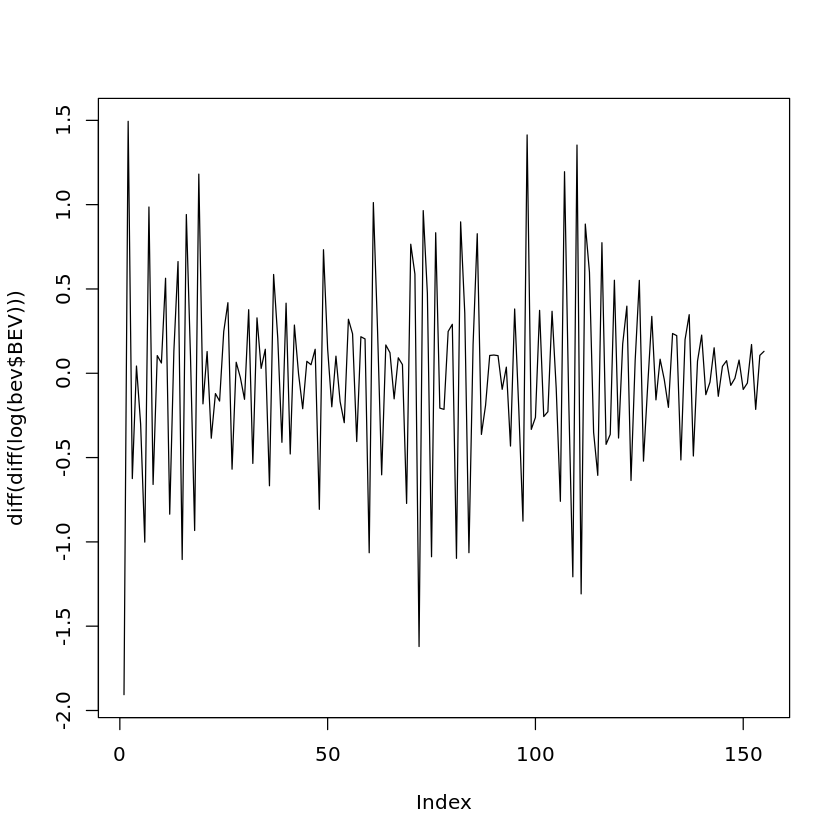

In [ ]:
plot(diff(diff(log(bev$BEV))), type='l')

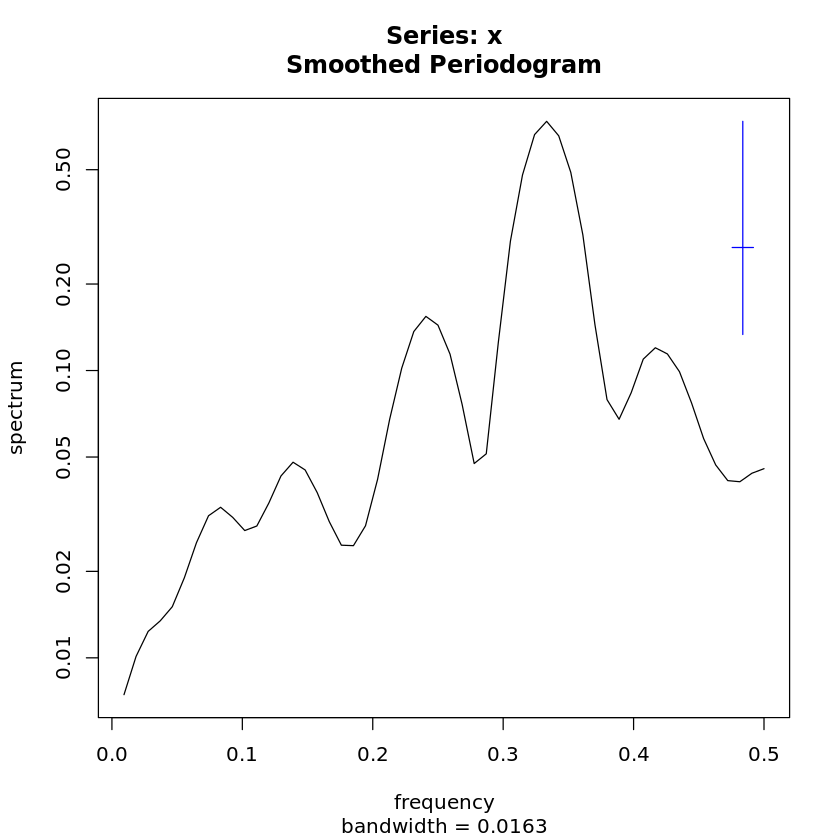

In [ ]:
spectrum(diff(log(bev$BEV[49:157])), spans=c(4,4))

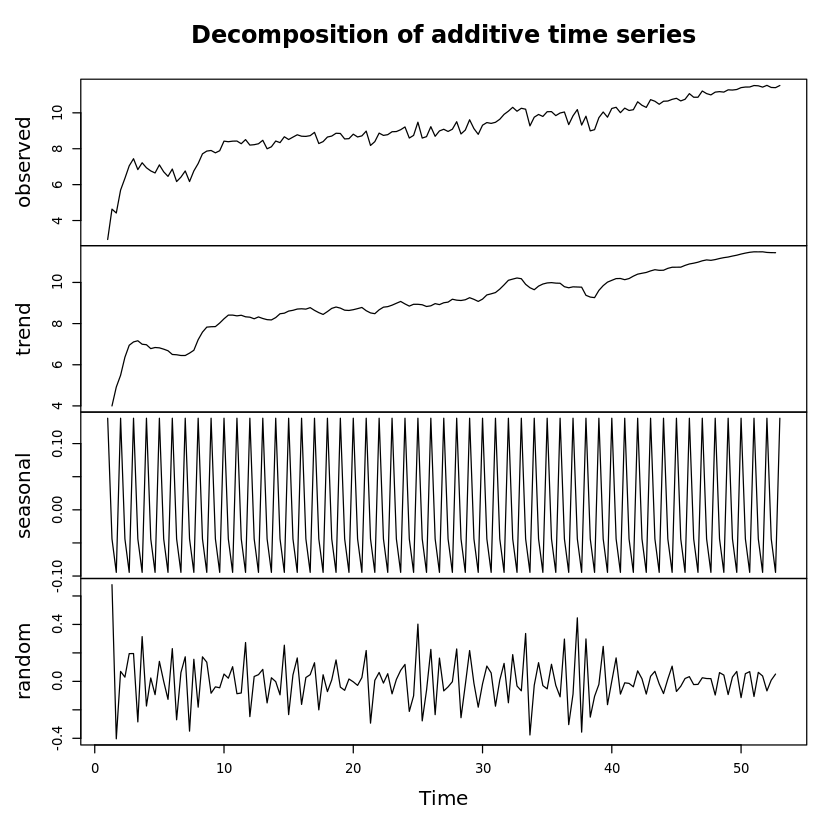

In [ ]:
dc <- decompose(ts(log(bev$BEV), frequency=3))
plot(dc)

## compare to sales of all light-duty vehicles

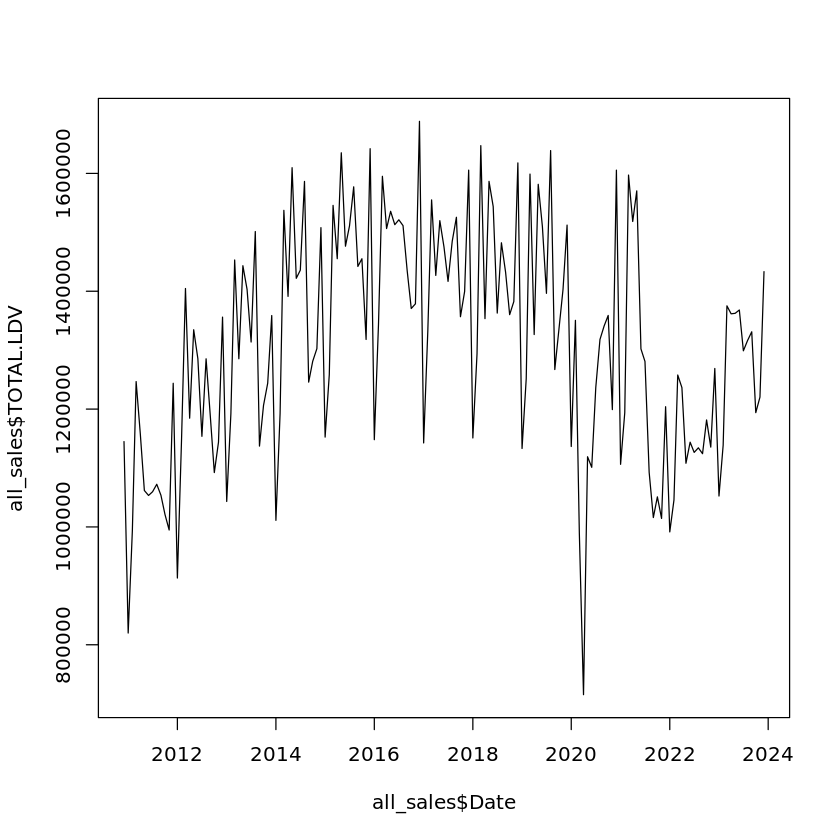

In [ ]:
all_sales = ev_sales[,2:6]
all_sales['ratio'] =  all_sales$BEV / all_sales$TOTAL.LDV
plot(all_sales$Date, all_sales$TOTAL.LDV, type='l')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84f5a85c-1df8-462e-ac98-3457bf0678ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>